# Construction

In [15]:
import csv
from math import *
from irfpy.moon import moon_map
from scipy.interpolate import interp1d

I=moon_map.MoonMapSmall().image              # Loading a Moon Map

Mx=interp1d([0,len(I[0])],[-pi,pi])          # Mapping Pixels to Longitude and Latitude 
My=interp1d([0,len(I)],[pi/2,-pi/2])

L=[['Longitude','Latitude','Color_r','Color_g','Color_b']]
for i in range(0,len(I),2):
    for j in range(0,len(I[0]),2):
        L.append([Mx(j),My(i),I[i][j][0]/256,I[i][j][1]/256,I[i][j][2]/256])
with open('Moon.csv','w',newline='') as file:
    csv.writer(file,delimiter=',').writerows(L)

# Use

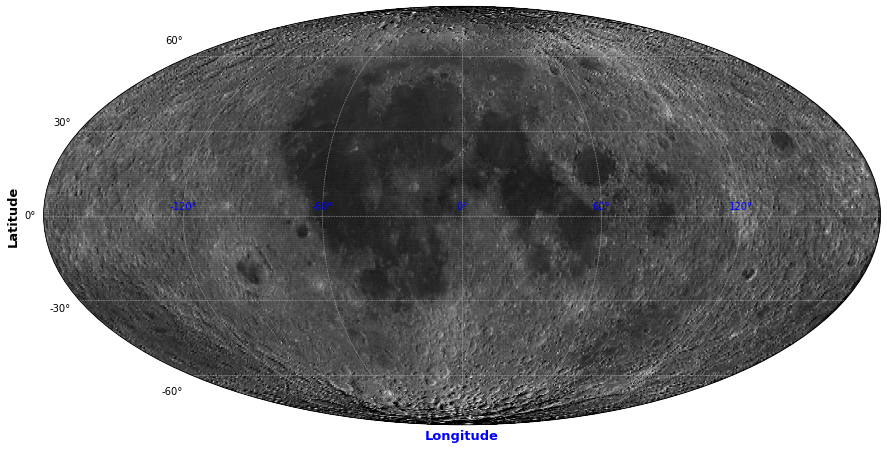

In [20]:
import pandas
import matplotlib.pyplot as p

C=pandas.read_csv('Moon.csv')                # Loading Moon Map

p.rcParams["figure.figsize"] = 15,8          # Setting matplotlib parameters
p.rcParams["axes.grid"] = True

p.figure()                                   # Setting a projection, here mollweide 
p.subplot(projection="mollweide")

Co=[]                                        # Setting Color Tuple
for i in range(len(C)):
    Co.append([(C['Color_r'][i],C['Color_g'][i],C['Color_b'][i])])

p.scatter(C['Longitude'],C['Latitude'],c=Co,s=2)

p.xlabel('Longitude',c='b',fontweight='bold',fontsize=13)
p.ylabel('Latitude',fontweight='bold',fontsize=13)
p.xticks([-2*pi/3,-pi/3,0,pi/3,2*pi/3],c='b')
p.yticks([-pi/3,-pi/6,0,pi/6,pi/3])

p.show()